# Chapter 10 - Unsupervised Learning

[10.2 Principal Components Analysis](#10.2-Principal-Components-Analysis)
> [10.2.1 What Are Principal Components?](#10.2.1-What-Are-Principal-Components?)

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


from sklearn.decomposition import PCA

%matplotlib inline
plt.style.use('seaborn-white')

## 10.2 Principal Components Analysis

### 10.2.1 What Are Principal Components?

In [3]:
df_heart = pd.read_csv('Data/USArrests.csv', index_col=0).dropna()
df_heart.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
X = df_heart.values

In [65]:
pca = PCA(n_components=2, whiten=True)
pcaX = pca.fit_transform(X)
pcaX = pcaX[:,:2]

#### FIGURE 10.1

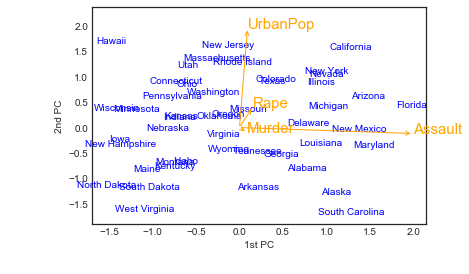

In [91]:
# the second pca component is inverted so the plot matches the book

fig, ax = plt.subplots()

ax.scatter(pcaX[:, 0], pcaX[:, 1], s=0)
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')

for i, txt in enumerate(df_heart.index):
    ax.annotate(txt, (pcaX[i, 0], -pcaX[i, 1]), horizontalalignment='center', verticalalignment='center', color='b')
    
components = pca.components_
for i, col in enumerate(df_heart.columns.tolist()):
    ax.annotate('', xy=(2*components[0, i], -2*components[1, i]), xytext=(0, 0), arrowprops=dict(arrowstyle="->", ec="orange"))
    ax.text(2*components[0, i], -2*components[1, i], col, size=15, color='orange')